# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
file='data/step3_output.csv'
df=pd.read_csv(file)
df.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,2
1,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
2,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1
3,Yosemite Ski & Snowboard Area,California,7800,600,0,0.0,0,0,0,1,...,88.0,0.0,110.0,84.0,300.0,47.0,47.0,107.0,0.0,1
4,Donner Ski Ranch,California,8012,750,0,0.0,0,0,0,1,...,505.0,60.0,163.0,82.0,400.0,75.0,75.0,170.0,0.0,1


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [3]:
from sklearn import preprocessing
X = df.drop(['Name','AdultWeekend','state','summit_elev'], axis=1)
y=df.AdultWeekend

#scale the data
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X)



In [4]:
#train-test split

from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y , test_size=0.25, random_state=1)

In [5]:
print(X)


     vertical_drop  trams  fastEight  fastSixes  fastQuads  quad  triple  \
0             1540      0        0.0          0          0     0       0   
1              294      0        0.0          0          0     0       1   
2             1800      0        0.0          0          1     2       3   
3              600      0        0.0          0          0     0       1   
4              750      0        0.0          0          0     0       1   
..             ...    ...        ...        ...        ...   ...     ...   
144            260      0        0.0          0          0     2       0   
145            400      0        0.0          0          0     1       0   
146            640      0        0.0          0          0     0       0   
147            810      0        0.0          0          0     0       1   
148           1571      0        0.0          0          0     1       1   

     double  surface  total_chairs  ...  LongestRun_mi  SkiableTerrain_ac  \
0         

In [6]:
print(y)

[53.         34.         78.         47.         75.         64.16681004
 59.         84.         69.         83.         50.         69.
 89.         56.         84.         65.         65.         60.
 55.         62.         42.         47.         32.         47.
 64.16681004 55.         35.         40.         45.         52.
 40.         43.         55.         49.         32.         75.
 79.         68.         40.         64.16681004 65.         49.
 49.         64.16681004 49.         34.         45.         45.
 45.         42.         50.         64.16681004 45.         47.
 44.         37.         58.         35.34       48.         59.
 47.         47.         39.         20.         70.         89.
 59.         64.16681004 50.         58.         93.         72.
 93.         45.         89.         77.         20.         49.
 55.         47.         80.         76.         63.2        42.
 75.         59.         30.         54.         67.         48.
 59.         57. 

In [7]:
# modeling
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = model.predict(X_test)


print(explained_variance_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.32250904816245907
7.4175134883246185


In [8]:
print(lm.intercept_)

56.319771644192414


In [9]:
pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])

,Coefficient
vertical_drop,1.200565e+00
trams,3.552714e-15
fastEight,4.440892e-16
fastSixes,4.440892e-16
fastQuads,1.574561e-01
quad,9.498019e-01
triple,7.018296e-01
double,1.002878e+00
surface,1.475630e-01
total_chairs,1.052211e+00


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [10]:
#df[df['Name'].str.contains('Big Mountain')]


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [11]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)



print(explained_variance_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.32250904816245907
7.4175134883246185


**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [12]:
y_pred = model.predict(X_test)
print(y_pred)

[59.60144233 42.13492555 47.19103196 55.71778946 64.56290767 55.46663545
 61.02447423 45.36711792 49.94946122 65.03195218 51.82430635 37.19365344
 53.58336135 82.76719609 44.29555553 37.12498214 39.42253118 62.65310276
 48.19510379 61.02324979 53.08175465 60.94529005 39.14783912 63.79678199
 65.38092544 63.67369087 56.29841818 61.84270696 60.01852583 35.41947161
 46.93514224 55.08440427 55.53816006 36.87717359 49.33629229 50.91348591
 52.4612892  48.55574197]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [13]:
print(df['AdultWeekend'])

0      53.0
1      34.0
2      78.0
3      47.0
4      75.0
       ... 
144    54.0
145    60.0
146    48.0
147    42.0
148    59.0
Name: AdultWeekend, Length: 149, dtype: float64


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

In [14]:
ac=df[df['Name'].str.contains('Big Mountain')]

print(ac)

Empty DataFrame
Columns: [Name, state, summit_elev, vertical_drop, trams, fastEight, fastSixes, fastQuads, quad, triple, double, surface, total_chairs, Runs, TerrainParks, LongestRun_mi, SkiableTerrain_ac, Snow Making_ac, daysOpenLastYear, yearsOpen, averageSnowfall, AdultWeekday, AdultWeekend, projectedDaysOpen, NightSkiing_ac, clusters]
Index: []

[0 rows x 26 columns]


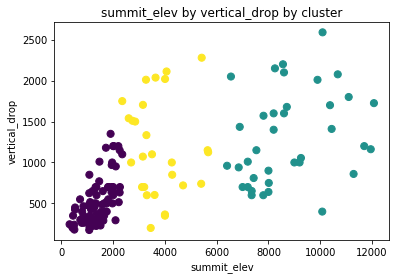

In [15]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [16]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [17]:
model_coef = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])

model_coef['EVS'] = explained_variance_score(y_test, y_pred)
model_coef['MAE'] = mean_absolute_error(y_test, y_pred)

model_coef.to_csv('models/model_metrics.csv', index = False)